<a href="https://colab.research.google.com/github/AmritaNeogi/practice_repo/blob/main/Gower's_Distance_based_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install numpy pandas matplotlib gower scikit-learn scipy seaborn

Generating a dummy data to work with

In [ ]:
import pandas as pd
import numpy as np

# Generate a new mixed dataset with numerical, categorical, and ordinal columns

data = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45, 50, 28, 32, 37, 42, 48, 55, 22, 27, 33, 38, 43, 49, 53, 60],  # Numerical
    'Income': [40000, 50000, 60000, 70000, 80000, 90000, 42000, 52000, 61000, 71000, 81000, 92000,
               38000, 45000, 58000, 67000, 77000, 88000, 97000, 120000],  # Numerical
    'Education_Level': ['High School', 'High School', 'Bachelor', 'Bachelor', 'Master', 'Master',
                        'High School', 'High School', 'Bachelor', 'Bachelor', 'Master', 'PhD',
                        'High School', 'High School', 'Bachelor', 'Bachelor', 'Master', 'PhD',
                        'PhD', 'PhD'],  # Ordinal
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
               'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],  # Categorical
    'Marital_Status': ['Single', 'Married', 'Single', 'Married', 'Single', 'Married', 'Single', 'Married',
                       'Single', 'Married', 'Single', 'Married', 'Single', 'Married', 'Single', 'Married',
                       'Single', 'Married', 'Single', 'Married'],  # Categorical
    'Car_Owner': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
                  'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']  # Binary (categorical)
})

df = data.copy()

df.head()

,Age,Income,Education_Level,Gender,Marital_Status,Car_Owner
0,25,40000,High School,Male,Single,Yes
1,30,50000,High School,Female,Married,No
2,35,60000,Bachelor,Male,Single,Yes
3,40,70000,Bachelor,Female,Married,No
4,45,80000,Master,Male,Single,Yes


In [ ]:
df.shape

(20, 7)

Encoding the ordinal column Education_Level

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['High School', 'Bachelor', 'Master', 'PhD']])
df['Education_Level'] = oe.fit_transform(df[['Education_Level']])
df.head()

,Age,Income,Education_Level,Gender,Marital_Status,Car_Owner
0,25,40000,0.0,Male,Single,Yes
1,30,50000,0.0,Female,Married,No
2,35,60000,1.0,Male,Single,Yes
3,40,70000,1.0,Female,Married,No
4,45,80000,2.0,Male,Single,Yes


Now, we have,


*   2 numerical columns : Age and Income
*   1 encoded Ordinal column: Education_level
*   3 categorical columns: Gender, Marital_Status and Car_Owner







Now, Let's get the Gower's Matrix using the Gower Library

In [ ]:
from gower import gower_matrix
gower_matrix = gower_matrix(df)
gower_matrix

array([[0.        , 0.54225504, 0.14006561, 0.68232065, 0.28013122,
        0.82238626, 0.01722294, 0.555092  , 0.15087005, 0.69312507,
        0.29532164, 0.9039367 , 0.01722294, 0.51893455, 0.12722865,
        0.66745114, 0.26526174, 0.8694908 , 0.40532735, 0.98277706],
       [0.54225504, 0.        , 0.59781057, 0.14006561, 0.7378762 ,
        0.28013122, 0.5250321 , 0.01283697, 0.60861504, 0.15087005,
        0.7530666 , 0.36168164, 0.559478  , 0.0233205 , 0.58497363,
        0.12519611, 0.7230067 , 0.32723576, 0.86307234, 0.44052204],
       [0.14006561, 0.59781057, 0.        , 0.54225504, 0.14006561,
        0.68232065, 0.12284268, 0.58497363, 0.01080445, 0.55305946,
        0.15525603, 0.7638711 , 0.15728855, 0.62113106, 0.01283697,
        0.52738553, 0.12519611, 0.7294252 , 0.26526174, 0.84271145],
       [0.68232065, 0.14006561, 0.54225504, 0.        , 0.59781057,
        0.14006561, 0.6650977 , 0.12722865, 0.53145057, 0.01080445,
        0.613001  , 0.22161603, 0.6995436 , 0

Visualizing the gower's matrix

<Axes: title={'center': "Gower's Matrix"}>

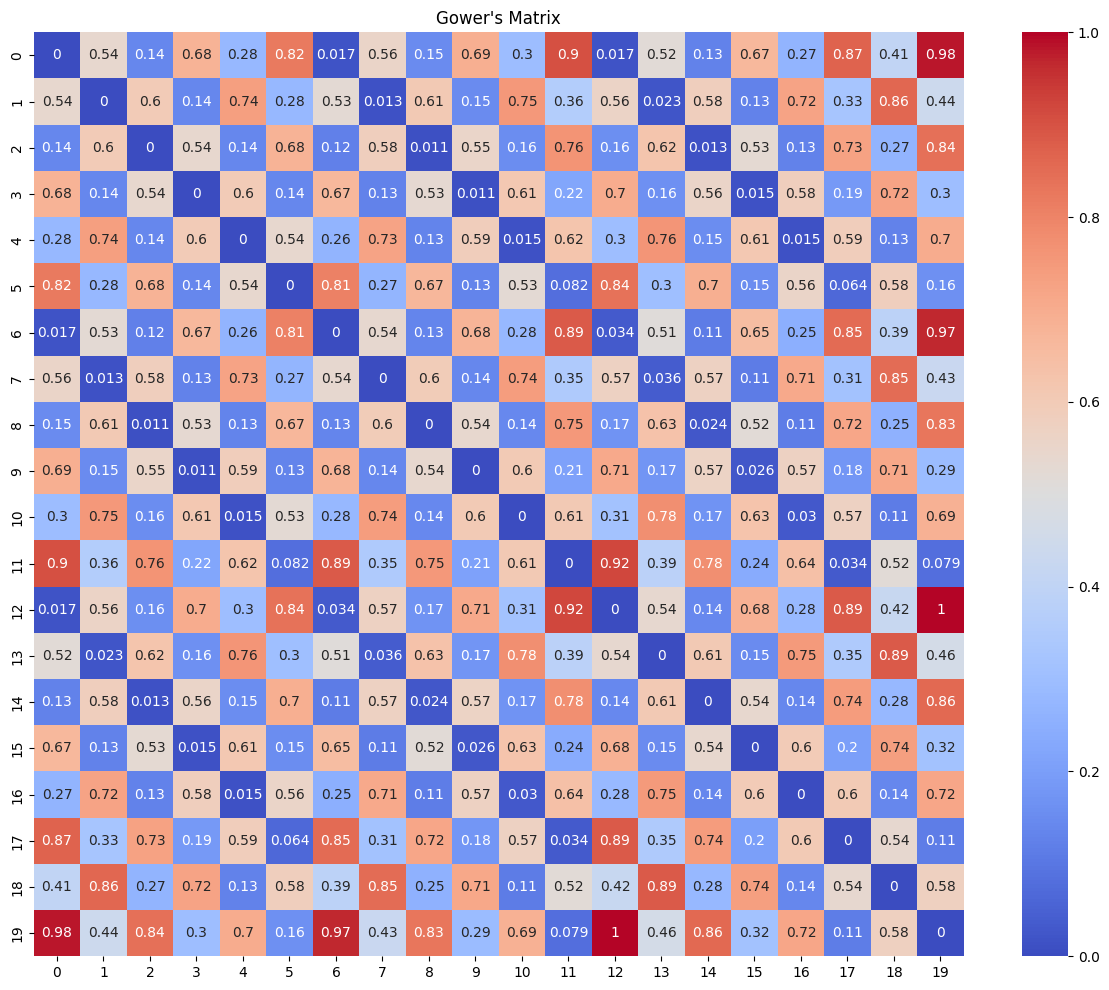

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 12))
plt.title("Gower's Matrix")
sns.heatmap(gower_matrix,annot = True,cmap='coolwarm')


Picking some examples to see how the pairwise distance feels like


*   I can see that row 2 and row 8 look pretty close
*   And, row 12 and row 19 look extremely distant



In [ ]:
df.iloc[[2,8],:]

,Age,Income,Education_Level,Gender,Marital_Status,Car_Owner
2,35,60000,1.0,Male,Single,Yes
8,37,61000,1.0,Male,Single,Yes


In [ ]:
df.iloc[[12,19],:]

,Age,Income,Education_Level,Gender,Marital_Status,Car_Owner
12,22,38000,0.0,Male,Single,Yes
19,60,120000,3.0,Female,Married,No


Now, let's use this metric for Hierarchical clustering using Sklearn library.

And then we will use silhouette scores for finding optimal number of clusters

A short visual explanation of silhouette score

The silhouette coefficient in clustering measures the similarity of a data point within its cluster (cohesion) compared to other clusters (separation).

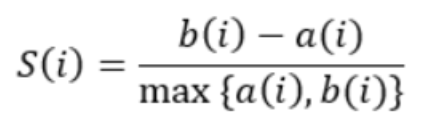






*   S(i) is the silhouette coefficient of the data point i.
*   a(i) is the average distance between i and all the other data points in the cluster to which i belongs.
*   b(i) is the average distance from i to all clusters to which i does not belong.

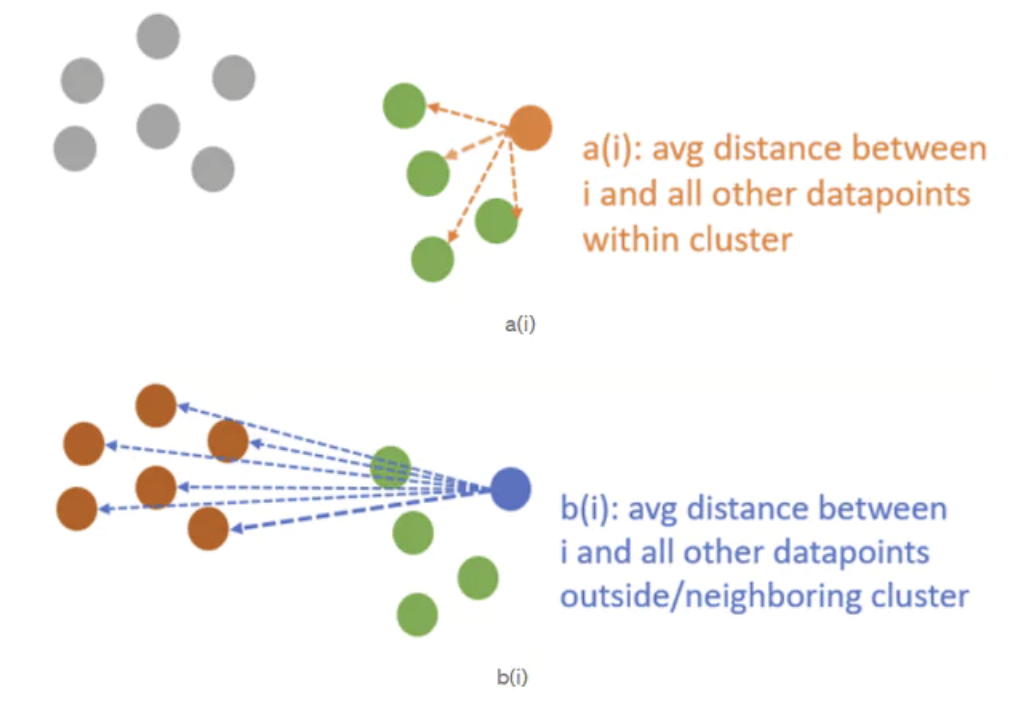





In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
silhouette_scores = {}

for n_clusters in range_n_clusters:
    clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='precomputed', linkage='average')
    cluster_labels = clustering.fit_predict(gower_matrix)
    silhouette_avg = silhouette_score(gower_matrix, cluster_labels, metric='precomputed')
    silhouette_scores[n_clusters] = silhouette_avg

# Determine the optimal number of clusters
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)

print(silhouette_scores)
print(optimal_clusters)

{2: 0.7322828, 3: 0.68799573, 4: 0.64896953, 5: 0.6858474, 6: 0.74242705, 7: 0.7492614, 8: 0.70382744, 9: 0.6880549, 10: 0.6368083}
7


Visualizing the silhouette scores

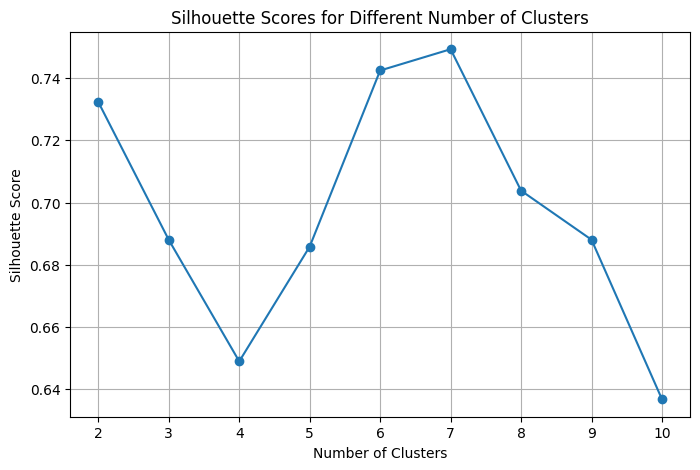

In [ ]:
# Visualize the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Imputing the cluster labels to our dataframe

In [ ]:
# Re-cluster using the optimal number of clusters
clustering = AgglomerativeClustering(n_clusters=optimal_clusters, metric='precomputed', linkage='average')
cluster_labels = clustering.fit_predict(gower_matrix)
df['Cluster'] = cluster_labels


Let's check which clusters do our previously identified data points belong to!

In [ ]:
df.iloc[[2,8],:]


,Age,Income,Education_Level,Gender,Marital_Status,Car_Owner,Cluster
2,35,60000,1.0,Male,Single,Yes,5
8,37,61000,1.0,Male,Single,Yes,5


In [ ]:
df.iloc[[12,19],:]

,Age,Income,Education_Level,Gender,Marital_Status,Car_Owner,Cluster
12,22,38000,0.0,Male,Single,Yes,3
19,60,120000,3.0,Female,Married,No,0
